PyTorch: 2.9.0+cu128
Device: cuda


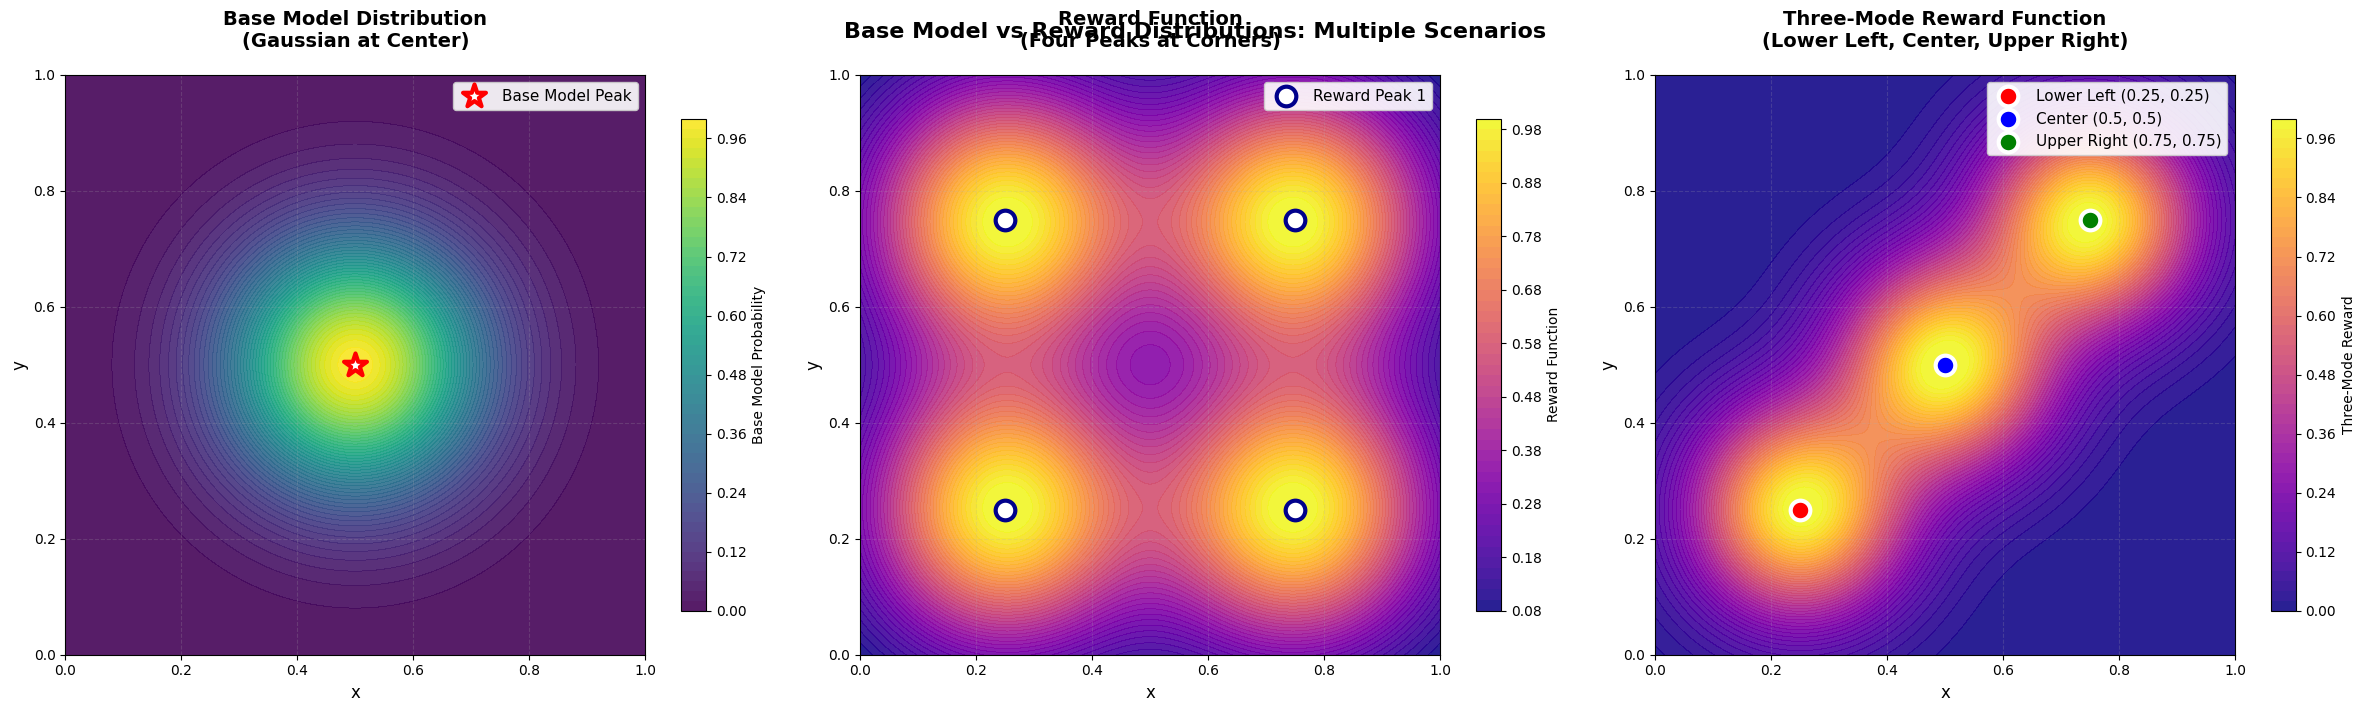

BASE MODEL vs REWARD DISTRIBUTIONS
Base Model: Gaussian at (0.5,0.5), σ=0.15
Four-Quadrant Reward: 4 peaks at corners (0.25,0.25), (0.75,0.25), (0.25,0.75), (0.75,0.75)
Three-Mode Reward: 3 peaks at (0.25,0.25), (0.5,0.5), (0.75,0.75)


In [1]:
import torch
from main_pairwise import budget_constrained_diffusion_pairwise
from reward import create_four_optima_reward_landscape  # or create_three_mode_reward_landscape
from visualization import visualize_base_model_distribution, visualize_gamma_and_diversity

print("PyTorch:", torch.__version__)
print("Device:", torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

visualize_base_model_distribution()

In [2]:
# Ground-truth reward for pairwise preference
reward_fn = create_four_optima_reward_landscape  # choose one

# Pairwise experiment parameters
k_observe = 100          # pairs per step (each pair uses 2 observations)
B = 1000                 # total observation budget
n_particles = 300        # particles generated each FKC step
n_steps = 100            # diffusion time steps per FKC run

print(f"Pairwise config: k_observe={k_observe}, B={B}, n_particles={n_particles}, n_steps={n_steps}")

Pairwise config: k_observe=100, B=1000, n_particles=300, n_steps=100


  Created new preference learning network
Step 0 [COLD START], Budget remaining: 1000
  Training preference network on 100 pairs
    Loss: 0.5725


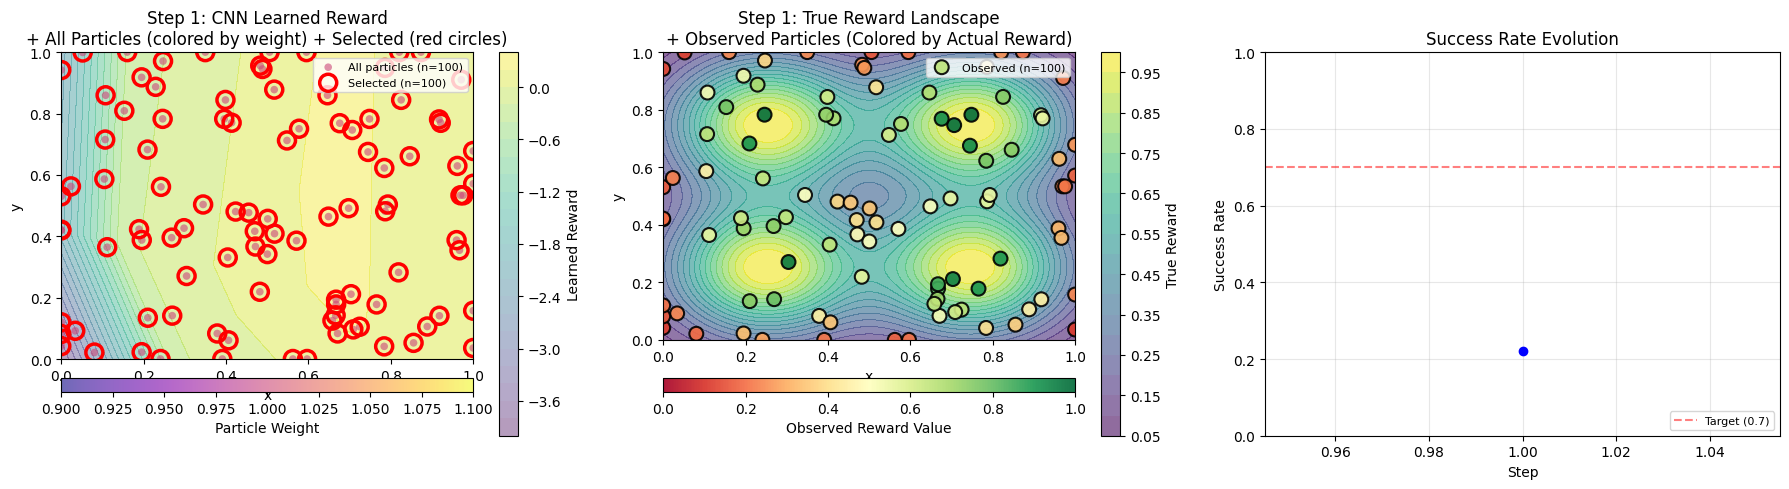

Step 1: 22/100 success (22.0%) | Avg: 0.492
Step 1, Budget remaining: 900
  Convergence check: 0.0000
  *** DIVERSITY DISABLED: Converged ***
  Gamma: 0.050 | Diversity: False
  Historical particles: 100


d:\vorobeychik-anindya\active-preference-alignment\main_pairwise.py:304: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\python_variable_methods.cpp:837.)
  print(f"  Convergence check: {float(reward_change):.4f}")


    Weight range: [0.00, 1.00] | Selected: [0.99, 1.00]
  Training preference network on 200 pairs...
    Loss: 0.4116


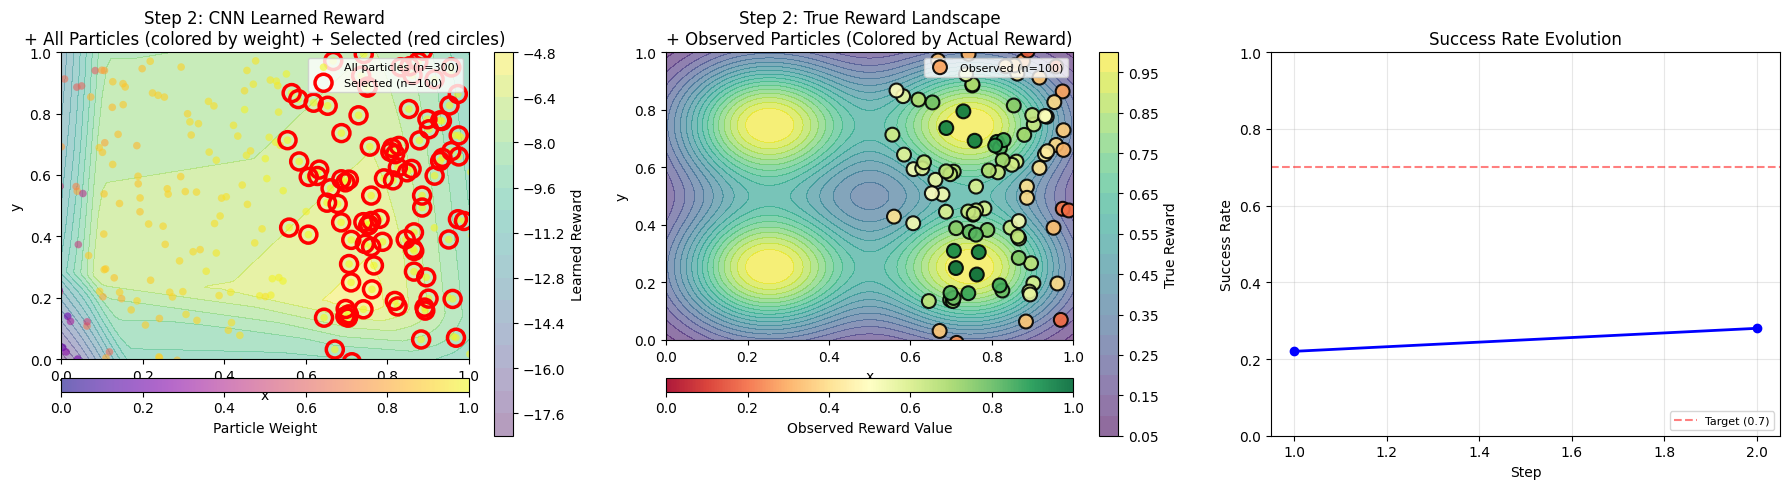

Step 2: 28/100 success (28.0%) | Avg: 0.575
Step 2, Budget remaining: 800
  Gamma: 0.044 | Diversity: False
  Historical particles: 200
    Weight range: [0.00, 1.00] | Selected: [0.87, 1.00]
  Training preference network on 300 pairs...
    Loss: 0.3798


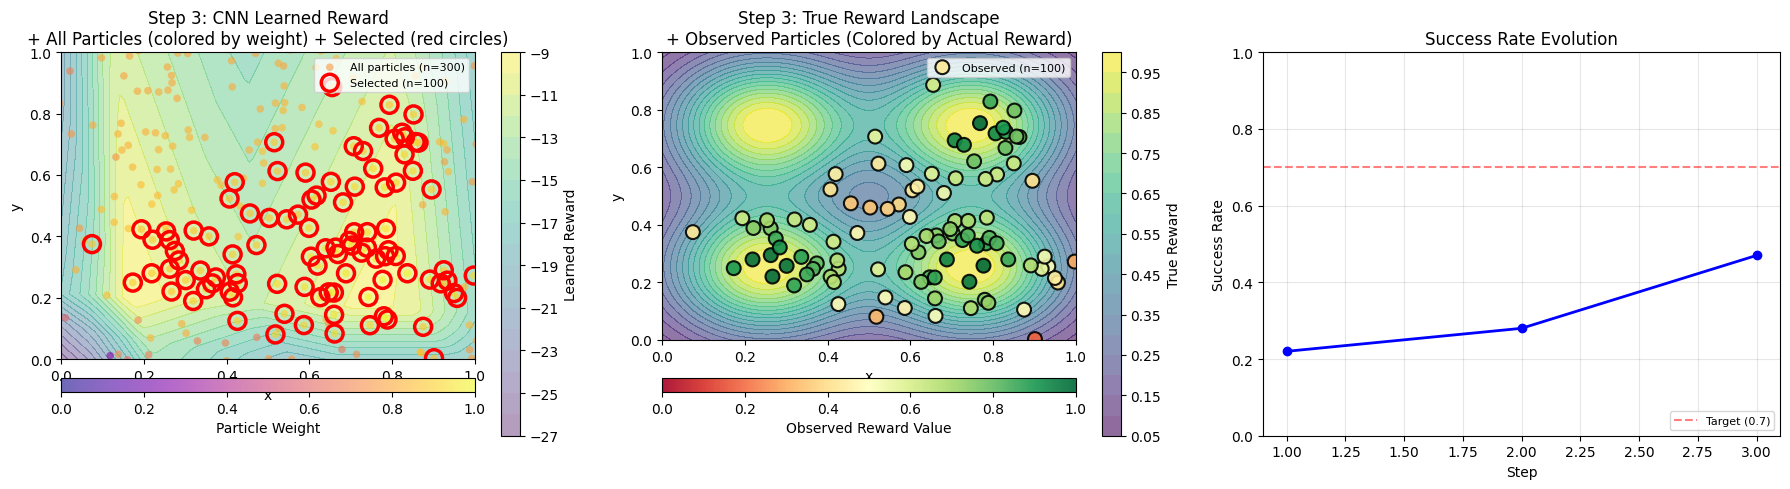

Step 3: 47/100 success (47.0%) | Avg: 0.683
Step 3, Budget remaining: 700
  Gamma: 0.039 | Diversity: False
  Historical particles: 300
    Weight range: [0.00, 1.00] | Selected: [0.86, 1.00]
  Training preference network on 400 pairs...
    Loss: 0.3796


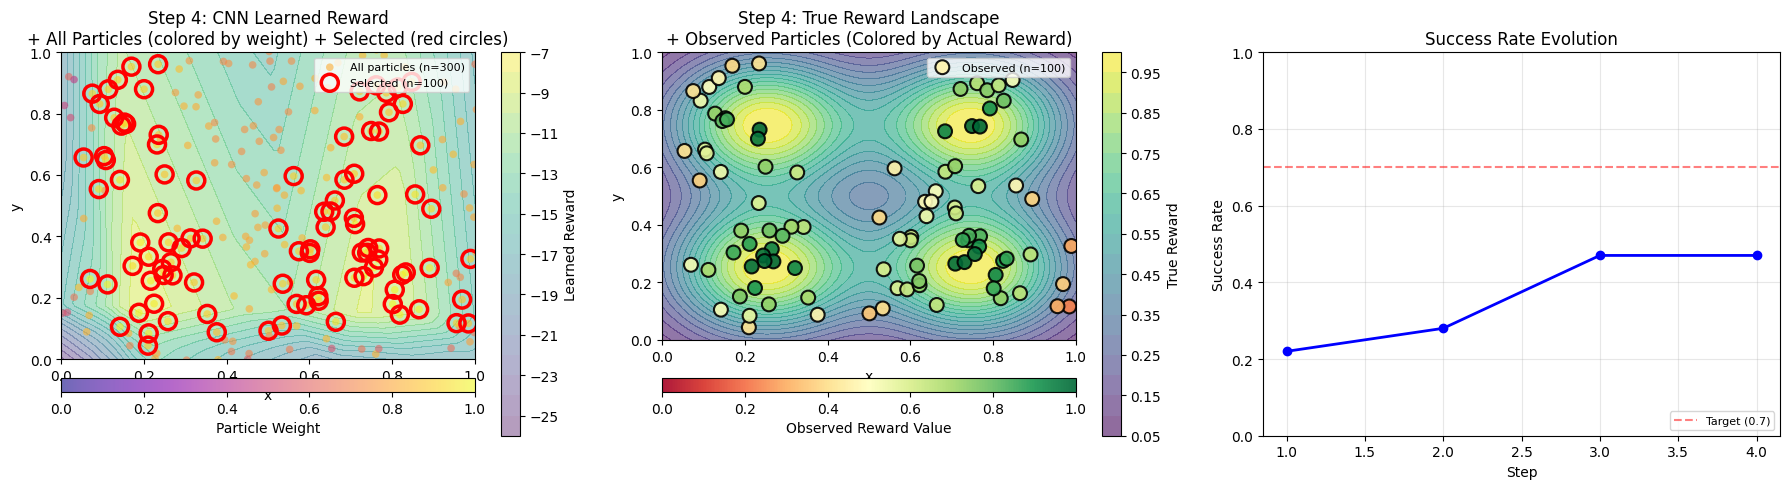

Step 4: 47/100 success (47.0%) | Avg: 0.676
Step 4, Budget remaining: 600
  Gamma: 0.033 | Diversity: False
  Historical particles: 400
    Weight range: [0.00, 1.00] | Selected: [0.83, 1.00]
  Training preference network on 500 pairs...
    Loss: 0.3712


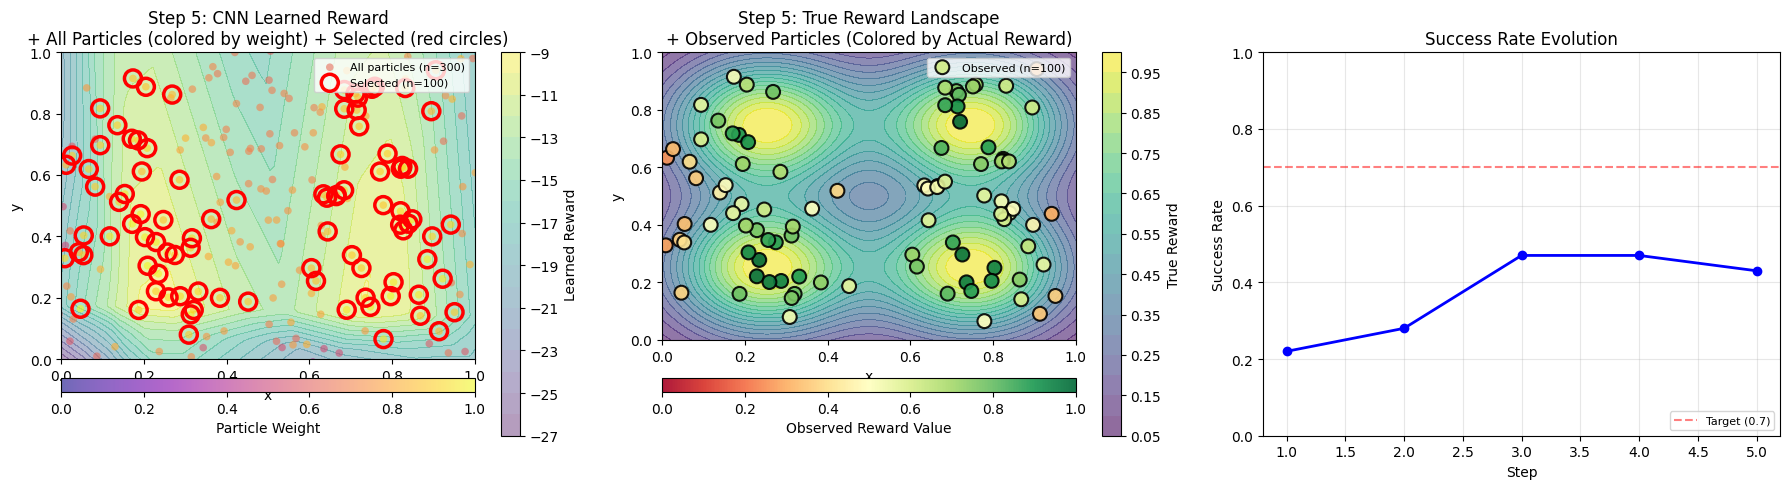

Step 5: 43/100 success (43.0%) | Avg: 0.626
Step 5, Budget remaining: 500
  Gamma: 0.028 | Diversity: False
  Historical particles: 500
    Weight range: [0.00, 1.00] | Selected: [0.86, 1.00]
  Training preference network on 600 pairs...
    Loss: 0.3664


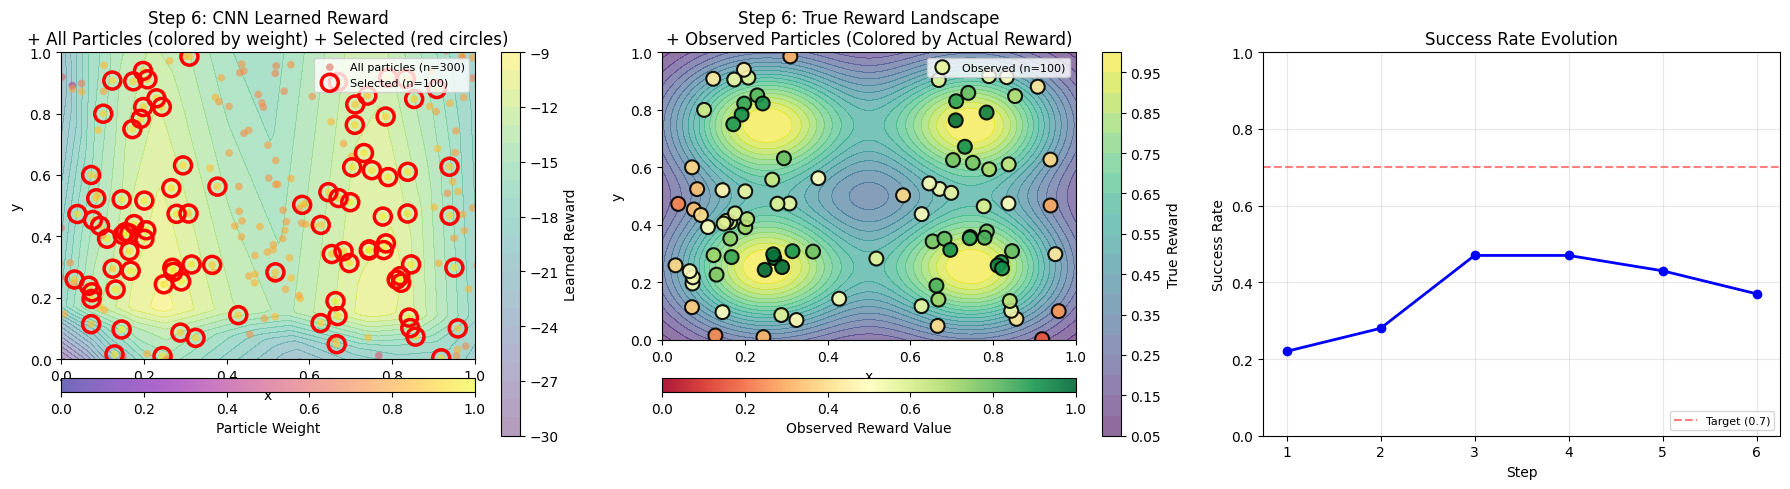

Step 6: 37/100 success (37.0%) | Avg: 0.606
Step 6, Budget remaining: 400
  Gamma: 0.022 | Diversity: False
  Historical particles: 600
    Weight range: [0.00, 1.00] | Selected: [0.83, 1.00]
  Training preference network on 700 pairs...
    Loss: 0.3756


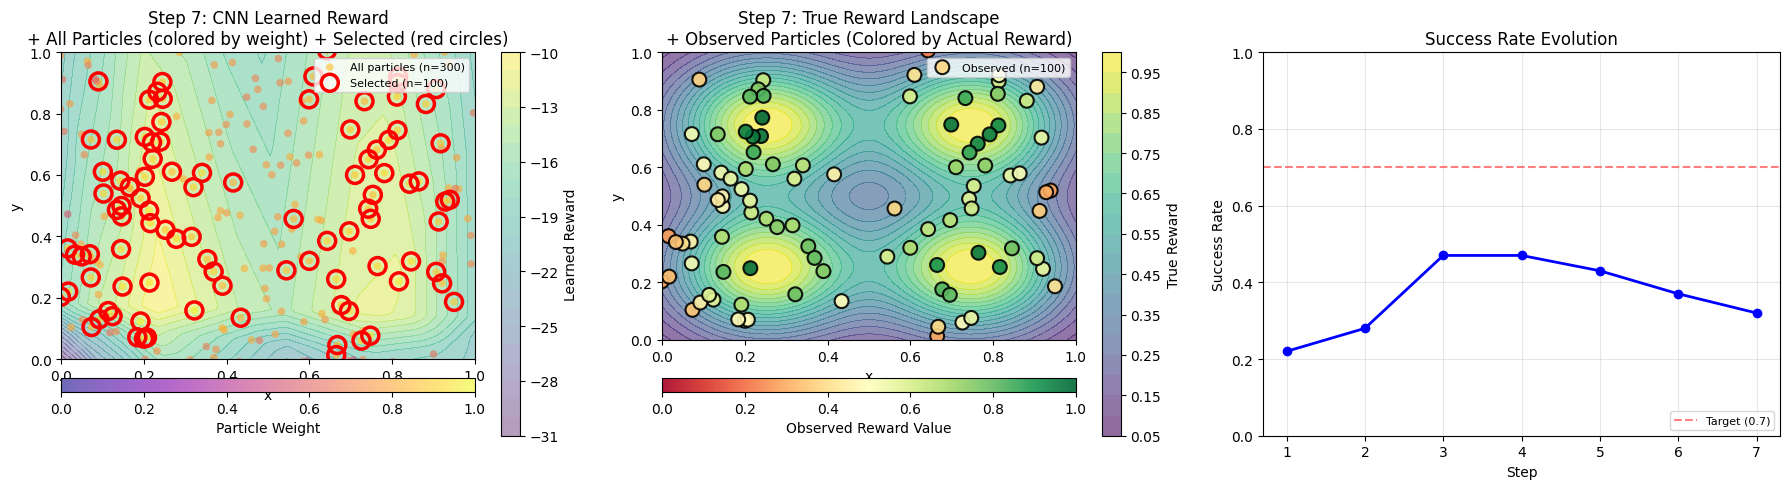

Step 7: 32/100 success (32.0%) | Avg: 0.598
Step 7, Budget remaining: 300
  Gamma: 0.017 | Diversity: False
  Historical particles: 700
    Weight range: [0.00, 1.00] | Selected: [0.80, 1.00]
  Training preference network on 800 pairs...
    Loss: 0.3669


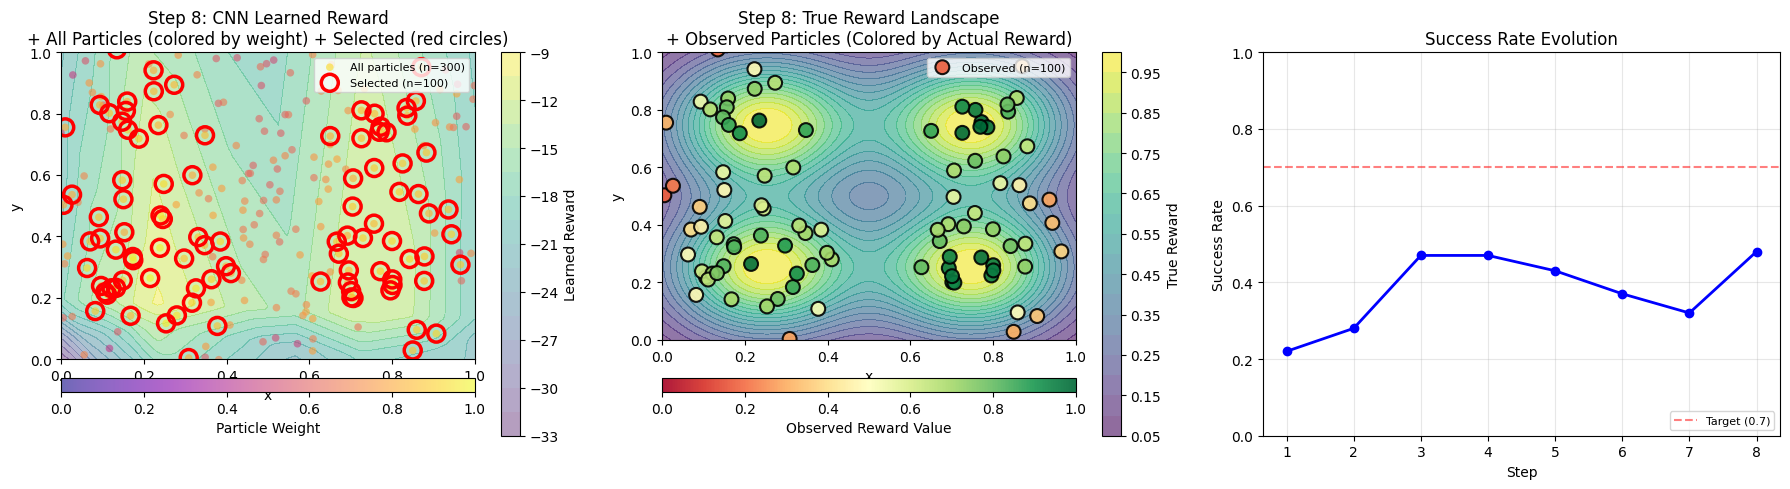

Step 8: 48/100 success (48.0%) | Avg: 0.669
Step 8, Budget remaining: 200
  Gamma: 0.011 | Diversity: False
  Historical particles: 800
    Weight range: [0.00, 1.00] | Selected: [0.84, 1.00]
  Training preference network on 900 pairs...
    Loss: 0.3689


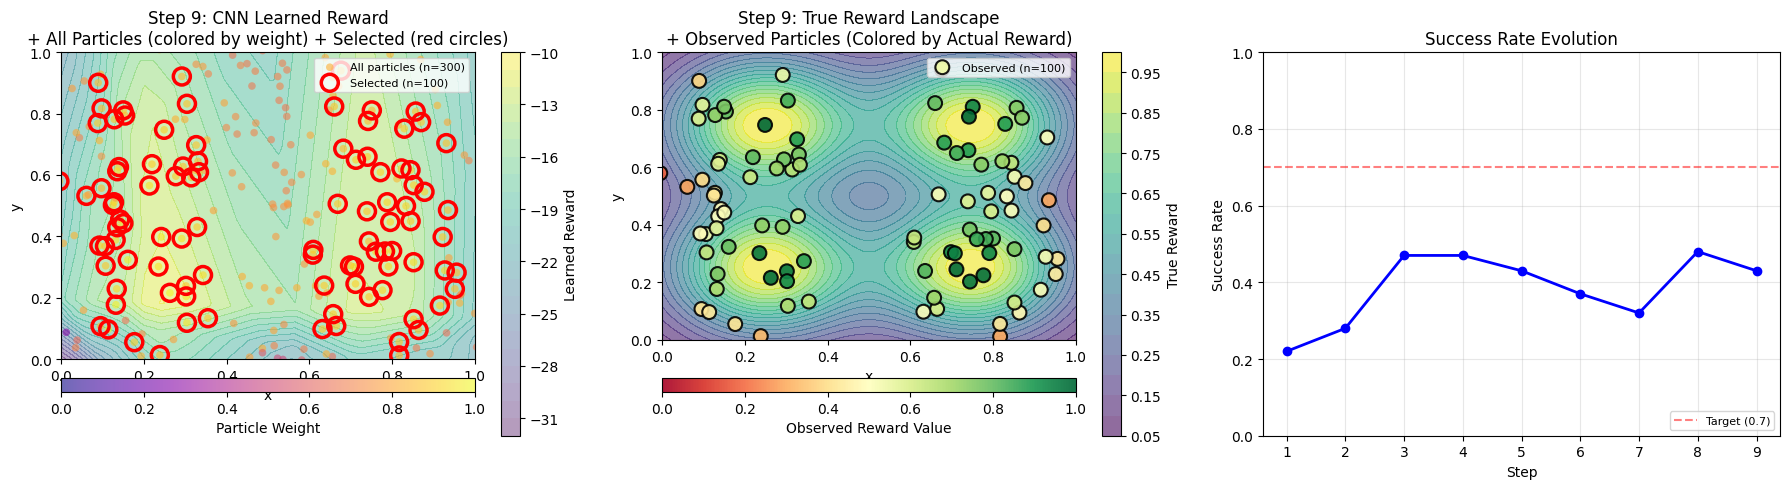

Step 9: 43/100 success (43.0%) | Avg: 0.641
Step 9, Budget remaining: 100
  Gamma: 0.006 | Diversity: False
  Historical particles: 900
    Weight range: [0.00, 1.00] | Selected: [0.86, 1.00]
  Training preference network on 1000 pairs...
    Loss: 0.2868


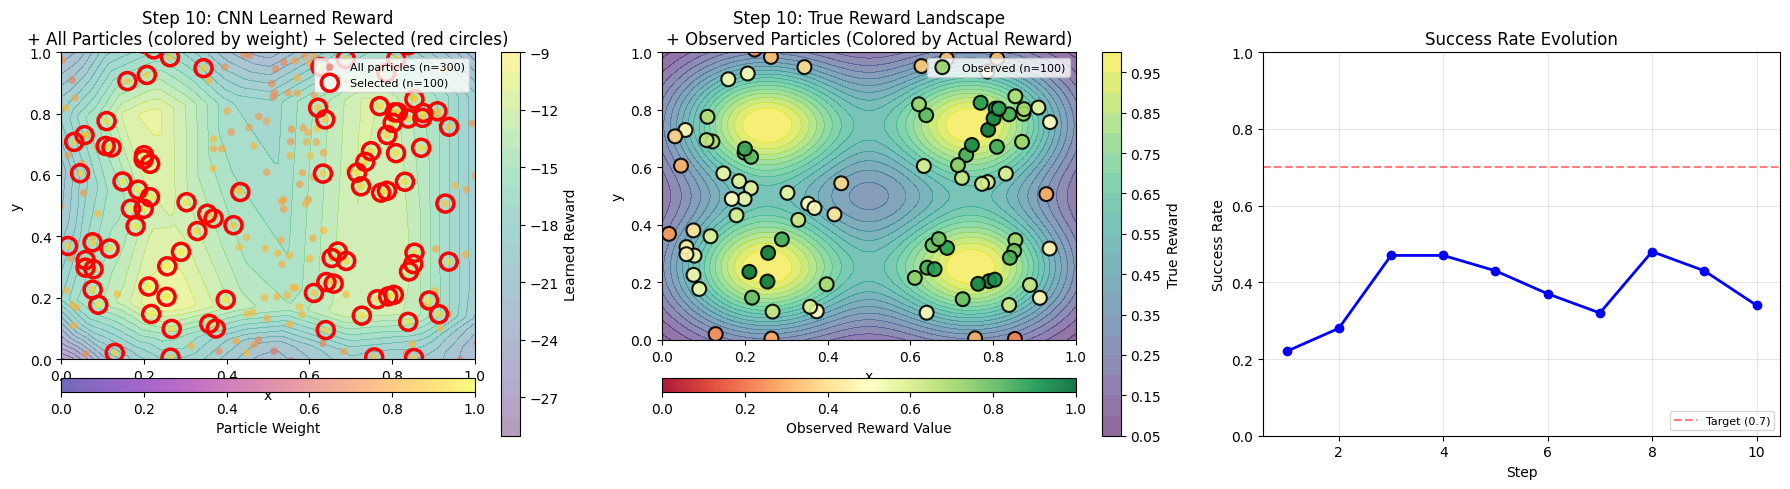

Step 10: 34/100 success (34.0%) | Avg: 0.593
Run complete.


In [3]:
results = budget_constrained_diffusion_pairwise(
    k_observe=k_observe,
    B=B,
    n_particles=n_particles,
    n_steps=n_steps,
    reward_fn=reward_fn
)
print("Run complete.")

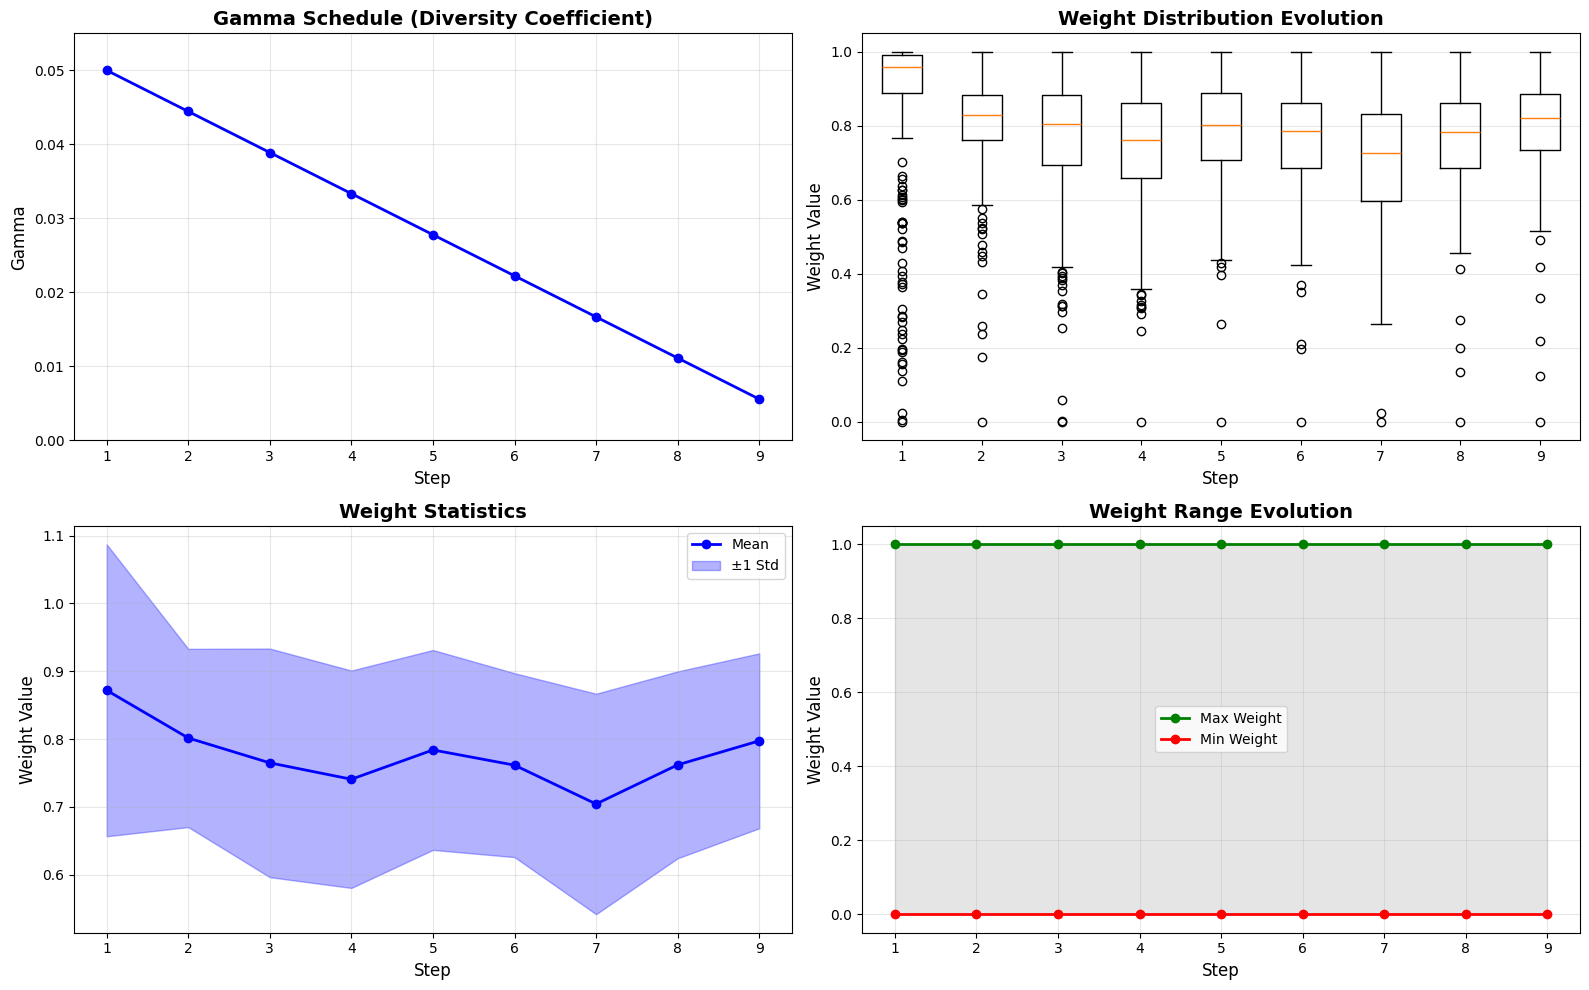


EXPERIMENT SUMMARY
Steps: 9 | Gamma: 0.006→0.050
Selection: top-100 particles | Final gamma: 0.006
Final success rate: 0.340


In [4]:
(
    all_particles,
    all_weights,
    all_pairs,
    all_winners,
    all_losers,
    success_rates,      # list of floats
    network,
    network_params,
    opt_state,
    gamma_history
) = results

# Final summary plots: gamma and weight evolution
visualize_gamma_and_diversity(
    gamma_history,
    all_weights,        # function handles tensors on GPU
    k_observe
)

print(f"Final success rate: {success_rates[-1]:.3f}")


DIVERSITY-BASED EXPLORATION VISUALIZATION



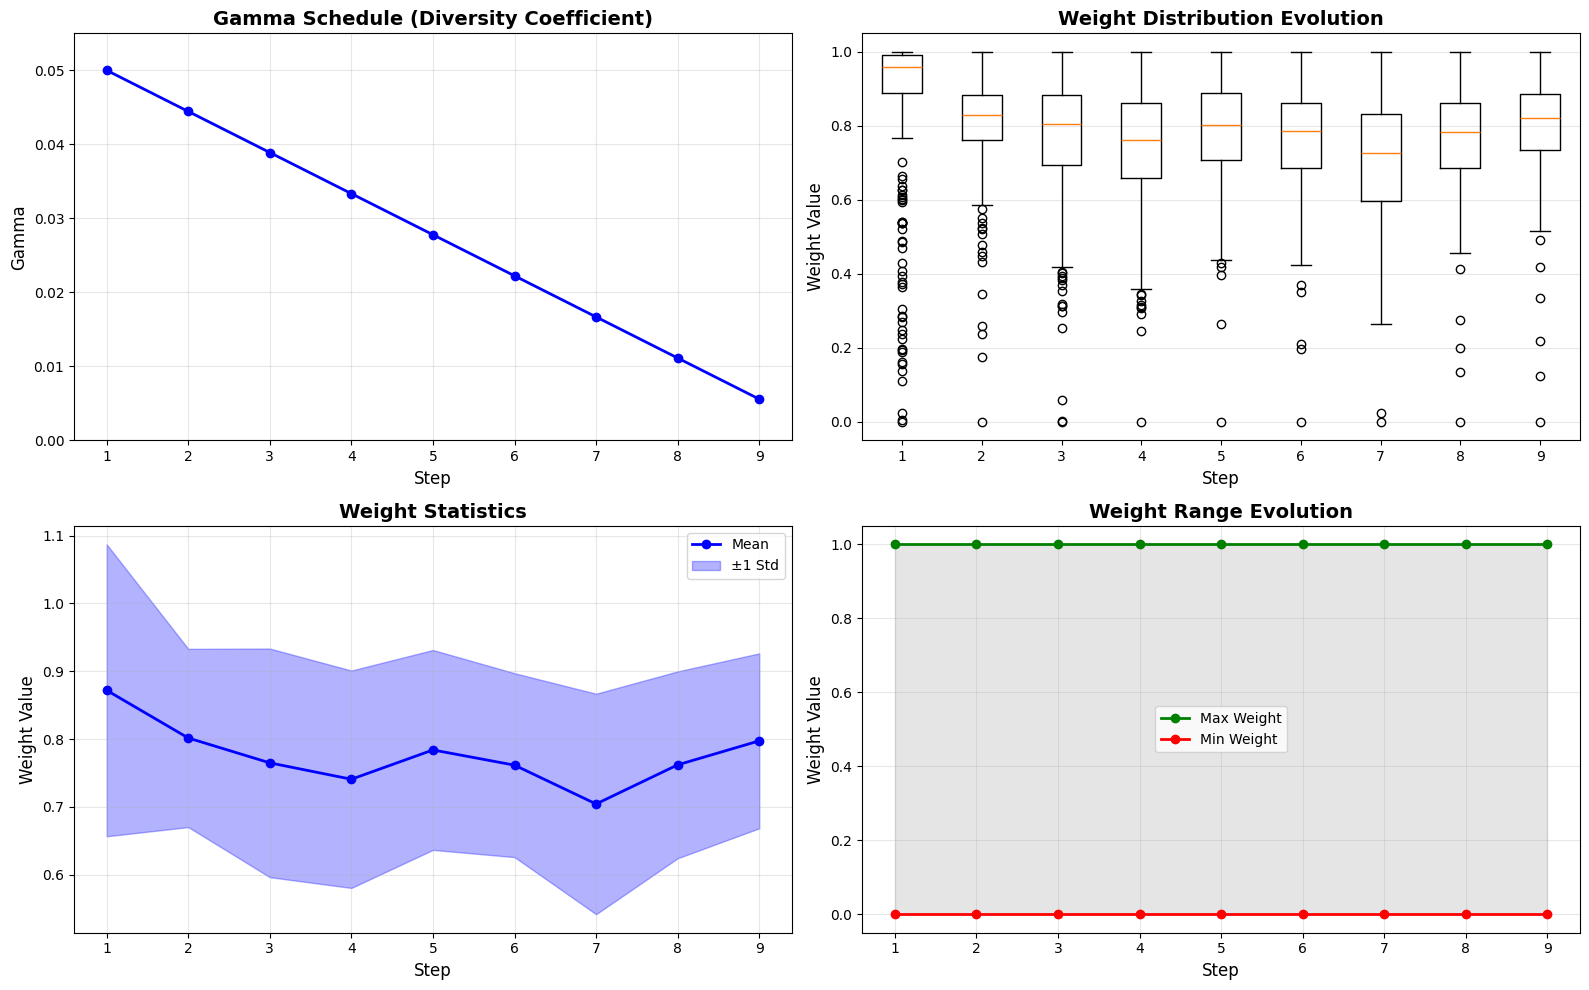


EXPERIMENT SUMMARY
Steps: 9 | Gamma: 0.006→0.050
Selection: top-100 particles | Final gamma: 0.006


In [5]:
# Visualize diversity-based behavior
print("\n" + "="*80)
print("DIVERSITY-BASED EXPLORATION VISUALIZATION")
print("="*80 + "\n")
visualize_gamma_and_diversity(gamma_history, all_weights, k_observe)